# What is Web Scraping?

Web scraping, web harvesting, or web data extraction is data scraping used for extracting data from websites. The web scraping software may directly access the World Wide Web using the Hypertext Transfer Protocol or a web browser. While web scraping can be done manually by a software user, the term typically refers to automated processes implemented using a bot or web crawler. It is a form of copying in which specific data is gathered and copied from the web, typically into a central local database or spreadsheet, for later retrieval or analysis.

In [11]:
from urllib.request import urlopen
url = "http://olympus.realpython.org/profiles/aphrodite"
page = urlopen(url)
html_bytes = page.read()
html = html_bytes.decode("utf-8")
print(html)

<html>
<head>
<title>Profile: Aphrodite</title>
</head>
<body bgcolor="yellow">
<center>
<br><br>
<img src="/static/aphrodite.gif" />
<h2>Name: Aphrodite</h2>
<br><br>
Favorite animal: Dove
<br><br>
Favorite color: Red
<br><br>
Hometown: Mount Olympus
</center>
</body>
</html>



In [12]:
title_index = html.find("<title>")
print(title_index)

start_index = title_index + len("<title>")
print(start_index)

end_index = html.find("</title>")
print(end_index)

title = html[start_index:end_index]
print(title)

14
21
39
Profile: Aphrodite


# What is Text Mining?

Text mining, also referred to as text data mining, similar to text analytics, is the process of deriving high-quality information from text. It involves "the discovery by computer of new, previously unknown information, by automatically extracting information from different written resources."

## Regular Expressions

Regular expressions—or regexes for short—are patterns that can be used to search for text within a string. Python supports regular expressions through the standard library’s re module.

References: https://realpython.com/python-web-scraping-practical-introduction/

In [13]:
import re
re.findall("ab*c", "ac")
re.findall("ab*c", "abcd")

['abc']

In [14]:
string = "Everything is <replaced> if it's in <tags>."
string = re.sub("<.*?>", "ELEPHANTS", string)
string

"Everything is ELEPHANTS if it's in ELEPHANTS."

In [15]:
pattern = "<title.*?>.*?</title.*?>"
match_results = re.search(pattern, html, re.IGNORECASE)
title = match_results.group()
title = re.sub("<.*?>", "", title) # Remove HTML tags

print(title)

Profile: Aphrodite


## Scraping data using 'Selenium' package in Python

Installation instructions:
    1) pip install selenium
    2) Download chrome web driver from "https://sites.google.com/chromium.org/driver/downloads?authuser=0"

My Google Chrome version is: 'Version 97.0.4692.99 (Official Build) (64-bit)'

# 1 - Web Scraping, Bots & Testing

In [16]:
from selenium import webdriver

In [17]:
from selenium import webdriver
PATH = "//Users//avinashok//Library//chromedriver" # For Windows: "C://Program Files (x86)//chromedriver.exe"
driver = webdriver.Chrome(PATH)

driver.get("https://techwithtim.net/")

/var/folders/2t/jqlc3nf57nd_lgfhkfxnq0y80000gn/T/ipykernel_9688/3217218830.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


In [18]:
print(driver.title)

Tech With Tim - Python & Java Programming Tutorials - techwithtim.net


In [9]:
driver.close()
#driver.quit()

Selenium Python Documentation: https://selenium-python.readthedocs.io/

# 2 - Locating Elements From HTML

In [19]:
from selenium.webdriver.common.keys import Keys
import time

search = driver.find_element_by_name("s")



/var/folders/2t/jqlc3nf57nd_lgfhkfxnq0y80000gn/T/ipykernel_9688/547928793.py:4: DeprecationWarning: find_element_by_name is deprecated. Please use find_element(by=By.NAME, value=name) instead
  search = driver.find_element_by_name("s")


In [20]:
search.send_keys("test")

search.send_keys(Keys.RETURN)

time.sleep(5)

In [21]:
print(driver.page_source)

<html lang="en-US" class=" js csstransforms csstransforms3d csstransitions"><head><meta charset="UTF-8"><meta name="viewport" content="width=device-width, initial-scale=1"><link rel="profile" href="http://gmpg.org/xfn/11"><link rel="pingback" href="https://www.techwithtim.net/xmlrpc.php">  <script src="https://pagead2.googlesyndication.com/pagead/managed/js/adsense/m202203140101/reactive_library_fy2019.js?bust=31065697"></script><script src="https://partner.googleadservices.com/gampad/cookie.js?domain=www.techwithtim.net&amp;callback=_gfp_s_&amp;client=ca-pub-6240468619130074&amp;cookie=ID%3D250e64717a0b0efd-22871b76bbd10039%3AT%3D1647692046%3ART%3D1647692046%3AS%3DALNI_MakHjUFy1himTV66i9AR39zgY0ctA"></script><script src="https://pagead2.googlesyndication.com/pagead/managed/js/adsense/m202203140101/show_ads_impl_with_ama_fy2019.js?client=ca-pub-6240468619130074&amp;plah=www.techwithtim.net&amp;bust=31065697" id="google_shimpl"></script><script type="text/javascript" async="" src="https

In [22]:

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

PATH = "//Users//avinashok//Library//chromedriver" # For Windows: "C://Program Files (x86)//chromedriver.exe"
driver = webdriver.Chrome(PATH)

driver.get("https://techwithtim.net/")
print(driver.title)

search = driver.find_element_by_name("s")
search.send_keys("test")
search.send_keys(Keys.RETURN)



/var/folders/2t/jqlc3nf57nd_lgfhkfxnq0y80000gn/T/ipykernel_9688/1497960688.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


Tech With Tim - Python & Java Programming Tutorials - techwithtim.net


/var/folders/2t/jqlc3nf57nd_lgfhkfxnq0y80000gn/T/ipykernel_9688/1497960688.py:14: DeprecationWarning: find_element_by_name is deprecated. Please use find_element(by=By.NAME, value=name) instead
  search = driver.find_element_by_name("s")


In [23]:
try:
#main = driver.find_elements_by_id("main")s
    main = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, "main"))
    )
    articles = main.find_elements_by_tag_name("article")
    for article in articles:
        header = article.find_element_by_class_name("entry-summary")
        print(header.text)

finally:
    driver.quit()

/Users/avinashok/opt/anaconda3/lib/python3.9/site-packages/selenium/webdriver/remote/webelement.py:359: UserWarning: find_elements_by_tag_name is deprecated. Please use find_elements(by=By.TAG_NAME, value=name) instead
  warnings.warn("find_elements_by_tag_name is deprecated. Please use find_elements(by=By.TAG_NAME, value=name) instead")
/Users/avinashok/opt/anaconda3/lib/python3.9/site-packages/selenium/webdriver/remote/webelement.py:446: UserWarning: find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead
  warnings.warn("find_element_by_class_name is deprecated. Please use find_element(by=By.CLASS_NAME, value=name) instead")


HTTP MethodsIn this tutorial we will talk about HTTP methods. HTTP methods are the standard way of sending information to and from a web server. To break it down, a website runs on a server or multiple servers and simple returns information to a client (web-browser). Information is exchanged between the client and the server […]
Creating a Base Template So you may have realized that creating new web pages for every single page on our website is extremely inefficient. Especially when our website follows a theme and has similar elements (like a sidebar) on every page. This is where template inheritance comes in. We will talk about how to inherit […]
Redirecting ContinuedStarting from where we left off in the last tutorial. I wanted to show how to redirect to a function that takes an argument (like our user function). To do this we simply need to define the parameter name and a value in the url_for function, like below.from flask import Flask, redirect, url_for app […]
What is Flask?Flask

In [24]:
#python selenium tutorial #3 / tech with tim ----------20.07.29------------

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time


driver = webdriver.Chrome(PATH)

driver.get("https://techwithtim.net/")

link = driver.find_element_by_link_text("Python Programming")
link.click()

try:
#main = driver.find_elements_by_id("main")s
    element = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.LINK_TEXT, "Beginner Python Tutorials"))
    )
    element.click()

    element = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, "sow-button-19310003"))
    )
    element.click()

    time.sleep(10)

    driver.back()
    driver.back()
    driver.back()

    time.sleep(10)

    driver.forward()
    driver.forward()

    time.sleep(5)

    driver.quit()
except:
    driver.quit()


# if you search a/th in search box first type "driver.clear()" to CLEAR everything in the search box not duplicate, append words.

/var/folders/2t/jqlc3nf57nd_lgfhkfxnq0y80000gn/T/ipykernel_9688/937714056.py:11: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)
/var/folders/2t/jqlc3nf57nd_lgfhkfxnq0y80000gn/T/ipykernel_9688/937714056.py:15: DeprecationWarning: find_element_by_link_text is deprecated. Please use find_element(by=By.LINK_TEXT, value=link_text) instead
  link = driver.find_element_by_link_text("Python Programming")


In [ ]:
#python selenium tutorial #4 / tech with tim ----------20.07.29------------

from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.remote.webelement import WebElement

driver = webdriver.Chrome(PATH)
driver.get("https://orteil.dashnet.org/cookieclicker/")

driver.implicitly_wait(25)

cookie = driver.find_element_by_id("bigCookie")
cookie_count = driver.find_element_by_id("cookies")

cookie = wait(driver, 10).until(EC.element_to_be_clickable((By.ID, "bigCookie")))

items = [driver.find_element_by_id("productPrice" + str(i)) for i in range (1, -1, -1)]

actions = ActionChains(driver)
actions.move_to_element(cookie)
actions.click(cookie)

for i in range(5000):
    actions.perform()
    count = int(cookie_count.text.split(" ")[0])
    for item in items:
        value = int(item.text)
        if value <= count:
            upgrade_actions = ActionChains(driver)
            upgrade_actions.move_to_element(item)
            upgrade_actions.click()
            upgrade_actions.perform()

## Retrieving data from APIs

API: API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other. It's a connection between computers or between computer programs. It is a type of software interface, offering a service to other pieces of software. A document or standard that describes how to build or use such a connection or interface is called an API specification.

### Example : Pulling data from an Open source COVID API

In this example, we would be connecting to an Open source COVID API just to extract and parse the json information in an customized manner.

Reference: https://www.askpython.com/python/examples/pull-data-from-an-api

In [25]:
import requests
import json
response_API = requests.get('https://api.covid19india.org/state_district_wise.json')
#print(response_API.status_code)

In [26]:
data = response_API.text

In [27]:
json.loads(data)

{'State Unassigned': {'districtData': {'Unassigned': {'notes': '',
    'active': 0,
    'confirmed': 0,
    'migratedother': 0,
    'deceased': 0,
    'recovered': 0,
    'delta': {'confirmed': 0, 'deceased': 0, 'recovered': 0}}},
  'statecode': 'UN'},
 'Andaman and Nicobar Islands': {'districtData': {'Nicobars': {'notes': 'District-wise numbers are out-dated as cumulative counts for each district are not reported in bulletin',
    'active': 0,
    'confirmed': 0,
    'migratedother': 0,
    'deceased': 0,
    'recovered': 0,
    'delta': {'confirmed': 0, 'deceased': 0, 'recovered': 0}},
   'North and Middle Andaman': {'notes': 'District-wise numbers are out-dated as cumulative counts for each district are not reported in bulletin',
    'active': 0,
    'confirmed': 1,
    'migratedother': 0,
    'deceased': 0,
    'recovered': 1,
    'delta': {'confirmed': 0, 'deceased': 0, 'recovered': 0}},
   'South Andaman': {'notes': 'District-wise numbers are out-dated as cumulative counts for ea

In [28]:
parse_json = json.loads(data)
active_case = parse_json['Kerala']['districtData']['Ernakulam']['active']
print("Active cases in Ernakulam:", active_case)

Active cases in Ernakulam: 26921


These data can also be extracted using Postman as well.

## Best Practices for Web Scraping
This is what a general DIY web scraping process looks like:
    -Identify the target website.
    -Collect URLs of the pages where you want to extract data from.
    -Make a request to these URLs to get the HTML of the page.
    -Use locators to find the data in the HTML.
    -Save the data in a JSON or CSV file or some other structured format.

## 13 Web Scraping Best Practices and Tips

Reference: https://www.blog.datahut.co/post/web-scraping-best-practices-tips

1. Check out if an API is available

An API or Application programming interface helps you get data you need via a simple computer program while hiding the complexity from data consumers. 

 

If an API is available, you pass a search query into the API, and it will return the data as a response. You can take this data and use it. Let us consider three possible cases. 

 

a) API is available, and the data attributes are sufficient: Use the API Service to extract the data.  

b) API is available, but the data attributes are insufficient for the use case: You need to use web scraping to get the data. 

c) API is not available: Scraping is the only way to gather the information you need. 


2. Be gentle
 

Every time you make a request - the target website has to use their server resources to get you a response. Therefore, the volume and frequency of queries you make should be minimal to not disrupt the website's servers. Hitting the servers too often affects the user experience of the target website. 

 

There are a few ways to handle it.

a) If possible, you can scrape during off-peak hours when the server load will be minimal compared to the peak hour. 

b) Limit the number of parallel / concurrent requests to the target website. 

c) Spread the requests across multiple IP's 

d) Add delays to successive requests  



3. Respect Robots.txt 
 

The robot.txt is a text file the website administrators create to instruct web scrapers on how to crawl pages on their website. Rules for acceptable behavior such as which web pages can and can't be scraped, which user agents are not allowed, how fast you can do it, how frequently you can do it, and so on will be contained in robot.txt.


If you're attempting web scraping - it is probably a good idea to look at the robot.text file first. The robot.txt file is available in the root directory. I'd also recommend you read the terms of service of the website. 

4. Don't follow the same crawling pattern.
Even though human users and bots consume data from a web page, there are some inherent differences. 


Real Humans are slow & unpredictable, but bots are fast but predictable. The anti-scraping technologies on the website use this fact to block web scraping. So it is probably a good idea to incorporate some random actions that confuse the anti-scraping technology. 


Once we explained this to a customer, and he said, "So you are making a scraper look like a drunken monkey to get around anti-scraping mechanisms."


5. Route your requests through Proxies
When your request hits the server of a target website - they'll know and log it. The website will have a record of every activity you are doing on the website. Websites will be having an acceptable threshold on the rate of requests they can receive from a single IP address. Once the request rate crosses this threshold - the website will block the IP. 

 

The best way to get around this problem is to route your requests through a proxy network and rotating the IPs frequently. You can get free but not so reliable IPs for experimental hobby projects. But for a serious business use case - you need a smart and reliable proxy network. 

 

There are several methods that can be used to change your outgoing IP.

a) VPN
VPN will change your original IP address into a new one and conceals your real IP. It helps you access location-based content. VPN is not really created for a large-scale business use case of scraping but ensuring anonymity for an individual user. However - for a small-scale use case, VPN is sufficient.


b) TOR
TOR or the Onion router routes your outgoing traffic through a free worldwide volunteer network with several thousand relays. You can use TOR to conceal your original location. TOR is very slow, and it could affect the speed of the scraping process. Putting more load on the TOR network might not be ethical as well. I would not recommend TOR for large-scale web scraping. 


c) Proxy services
Proxy services are the IP masking systems developed with business users in mind. The proxy services usually have a large pool of IP addresses to route your requests. It is better in terms of scale and reliability.


Depending on your use case and budget - you can choose from Shared proxies, residential proxies, or Datacenter proxies. Residential proxies are expensive and only used as a last resort. Residential IPs are the most efficient in sending anonymous requests.


6. Rotate User Agents and Request Headers 
User-Agents
When your browser connects to a website, it identifies itself through the user agent and says to the server. Hey, Hi, I'm Mozilla Firefox on MAC OS" or "Hi, I'm Chrome on an iPhone." 


Here is the common format of a user agent string

User-Agent: Mozilla/5.0 (<system-information>) <platform> (<platform-details>) <extensions>

 

Here is an example of a real user agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36

 

Assume you are making a simple request using the Python requests library. If you don't use a user agent in your request - the target website will detect that you are not a real user and block you from accessing the content. Using and rotating common user agents between successive requests is one of the best practices of web scraping. User-Agent lists are available publically online and you have to use User-agent rotation to scrape the data without getting blocked. Also, it helps the server to identify you as a legitimate user requesting content from a real browser.

 

User-agent Rotation is often overlooked by people who do web scraping. 


7. Request Headers
When you are hitting the target website with your request - you don't just say - give me the information now. You need to provide the context of your request so that the server can get you a tailored response. A request header provides context to an HTTP request.

 

There are five types of request headers every programmer who uses an automation library to perform web scraping needs to know. 

 

HTTP header User-Agent - Specifies what user agent is being used

HTTP header Accept-Language - It specifies which language the user understands.

HTTP header Accept-Encoding -The Accept-Encoding request-header specifies to the target website server what compression algorithm to use when the request is handled

HTTP header Accept - Specifies what kind of data format to be responded with

HTTP header Referer - Specifies the referring page URL or previous web page's address before the request is sent to the server. In many cases, using google as a referring domain is a clever way to optimize your scraper.  

 

The best practice is to inspect the responses using a tool like Postman and use additional Request Headers to optimize the scraper. Such practices can help beat intelligent anti-crawling mechanisms. The target website will get the idea that the traffic is coming from a REAL browser.
    
8. Cache to avoid unnecessary requests
If there is a way to know the pages, your web scraper already visited - the time to complete a scrape can be reduced. That is where caching comes into play. It is a good idea to cache HTTP requests and responses. Then, you can simply write it to a file for a one-time thing and if you need to perform the scrape repeatedly - write it to a database. Caching the pages can help you avoid making unnecessary requests. 


Another case of unnecessary requesting is the loose scraper logic when there is a case of paginations. Make sure you spend time finding efficient combinations that get you the maximum coverage instead of brute-forcing with every possible combination. Always Optimize the scraper logic to avoid making unnecessary requests.
    

9. Beware of Honeypot Traps
Honeypot traps or honeypot links are links placed on a website by website designers to detect web scrapers. These are links that a human or a legitimate user using a browser can't see, but a web scraper can. So if a honeypot link is accessed - the server can confirm it is not a real human and start blocking the IPs or put the scraper into a wild goose chase draining the resources. 


While learning web scraping using the Python requests library - I once ran into the Honeypot Trap on a website. Took me a lot of time to figure out what is wrong. 

Honeypot links usually have their background-color CSS property set to None to mask it from users. Take advantage of this to check if the link is a honeypot link or not. 
    
    
10. Use Captcha Solving Services
CAPTCHA service is a common method used by companies to block web scraping. Websites ask visitors to solve various puzzles to confirm they're legitimate users. Advanced scraping operations require Captcha Solving Services to get around Captcha.


11. Scrape data at off-peak hours
During peak hours, the server load on the target website will also be at its peak. Therefore, scraping during peak hours might result in a bad user experience for the website's actual users. A great way to handle this is to schedule your scrape to off-peak hours. You can use a tool like cron to schedule scrapers. 

 

12. Use a headless browser. 
It is easy for web servers to identify if the request is coming from a real browser. This can help them block your IPs.


Fortunately, Headless browsers have built-in browser tools to help solve the problem. A headless browser, as the name suggests, is a browser without the GUI. There are cases where you need browser automation to scrape data. Headless browsers have built-in browser tools that can help solve a lot of javascript related problems. There are many browser Automation libraries like selenium, puppeteer, playwright, PhantomJS, CasperJS, etc.

 

13. The legal issues you should be looking at 
The purpose of compliance is to protect your business from unwanted lawsuits, claims, fines, penalties, unwanted negative PR, and investigations. Compliance also ensures that organizations do not overuse scraping activities and misuse the data they acquire. Before attempting web scraping - every programmer should look at the possible compliance issues. From sending anonymous requests to performing advanced scraping operations - is a complicated process.


a) Is the data behind a login?
If the data is behind a login, scraping the data without permission from the target websites is illegal. It can result in your account being suspended, canceled, or expose to a lawsuit. If you have permission, you'll need to use some advanced methods and tools to get the data.


b) Does it violate copyright?
On some websites, the content can be copyrighted. A good example is music and videos. If you scrape such data and use it - it can have Copyright Issues, and the owner of the actual content can file a copyright infringement suit. Thus, copyright law violations are serious, and you could be liable for paying a heavy fine.  


c) Does it violate Trespass to chattel law?
If you're not so nice with your scraping and do a ton of parallel requests, there is a chance that you turn the scraping activity into a DDoS attack.  If data scraping overloads the server, you could be held responsible for the damage can be prosecuted under the "trespass to chattels" law (Dryer and Stockton 2013). 


d) Does it violate GDPR?
GDPR puts breaks on scraping activities when it is PII or personally identifiable information. Therefore, you have to audit your scraper logic to filter the personally identifiable information. 

 

# Statistical Text Processing

Reference: https://www.analyticsvidhya.com/blog/2021/12/text-classification-of-news-articles/

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avok\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\avok\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\avok\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Import Dataset
### Import the dataset which we will have to use.

In [29]:
dataset = pd.read_csv("./training_data/BBC News Train.csv")
dataset.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


### Shape of Dataset

In [30]:
dataset.shape

(1490, 3)

### Check Information of Columns of Dataset

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


## Count Values of Categories
### There are five news categories i.e. Sports, Business, Politics, Entertainment, Tech.

In [32]:
dataset['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

## Convert Categories Name into Numerical Index
### Convert the given news categories into categorical values.

In [33]:
# Associate Category names with numerical index and save it in new column CategoryId
target_category = dataset['Category'].unique()
print(target_category)

['business' 'tech' 'politics' 'sport' 'entertainment']


In [34]:
dataset['CategoryId'] = dataset['Category'].factorize()[0]
dataset.head()

,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0


## Show Category’s Name w.r.t Category ID
### Here you can show that news category’s name with respect to the following unique category ID.

In [35]:
# Create a new pandas dataframe "category", which only has unique Categories, also sorting this list in order of CategoryId values
category = dataset[['Category', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
category

,Category,CategoryId
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


# Exploratory Data Analysis (EDA)

## Visualizing Data

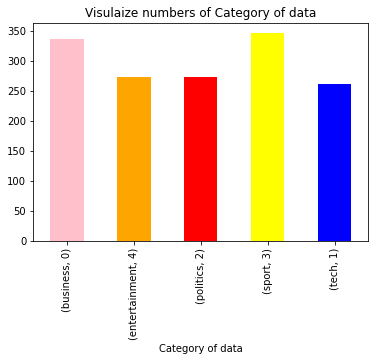

In [36]:
dataset.groupby('Category').CategoryId.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()

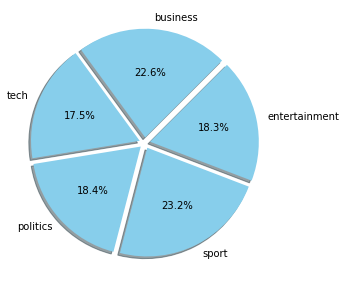

In [37]:
fig = plt.figure(figsize = (5,5))
colors = ["skyblue"]
business = dataset[dataset['CategoryId'] == 0 ]
tech = dataset[dataset['CategoryId'] == 1 ]
politics = dataset[dataset['CategoryId'] == 2]
sport = dataset[dataset['CategoryId'] == 3]
entertainment = dataset[dataset['CategoryId'] == 4]
count = [business['CategoryId'].count(), tech['CategoryId'].count(), politics['CategoryId'].count(), sport['CategoryId'].count(), entertainment['CategoryId'].count()]
pie = plt.pie(count, labels = ['business', 'tech', 'politics', 'sport', 'entertainment'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05, 0.05, 0.05,0.05))

## Visualizing Category Related Words
### Here we use the word cloud module to show the category-related words.

business related words:


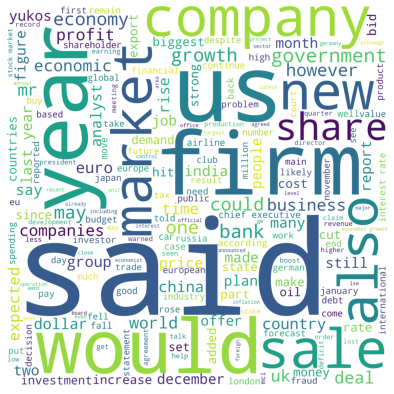

tech related words:


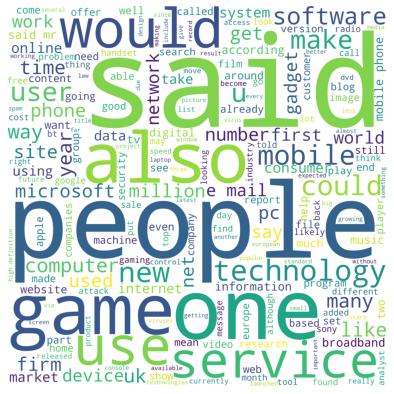

politics related words:


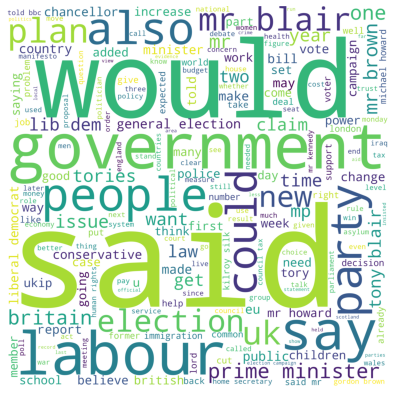

sport related words:


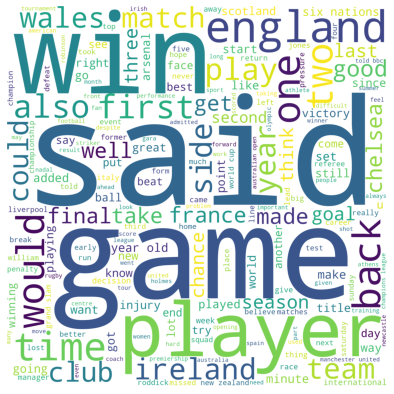

entertainment related words:


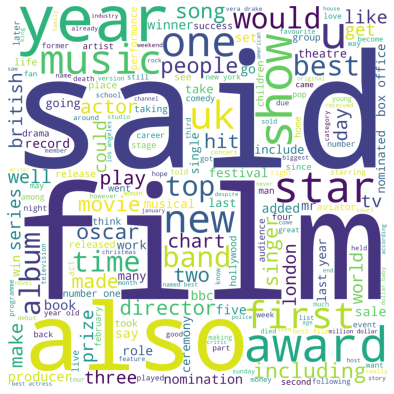

In [39]:
from wordcloud import WordCloud

stop = set(stopwords.words('english'))

business = dataset[dataset['CategoryId'] == 0]

business = business['Text']

tech = dataset[dataset['CategoryId'] == 1]

tech = tech['Text']

politics = dataset[dataset['CategoryId'] == 2]

politics = politics['Text']

sport = dataset[dataset['CategoryId'] == 3]

sport = sport['Text']

entertainment = dataset[dataset['CategoryId'] == 4]

entertainment = entertainment['Text']

def wordcloud_draw(dataset, color = 'white'):

    words = ' '.join(dataset)

    cleaned_word = ' '.join([word for word in words.split() if (word != 'news' and word != 'text')])

    wordcloud = WordCloud(stopwords = stop,

    background_color = color,

    width = 2500, height = 2500).generate(cleaned_word)

    plt.figure(1, figsize = (10,7))

    plt.imshow(wordcloud)

    plt.axis("off")

    plt.show()

print("business related words:")

wordcloud_draw(business, 'white')

print("tech related words:")

wordcloud_draw(tech, 'white')

print("politics related words:")

wordcloud_draw(politics, 'white')

print("sport related words:")

wordcloud_draw(sport, 'white')

print("entertainment related words:")

wordcloud_draw(entertainment, 'white')

## Show Text Column of Dataset

In [40]:
text = dataset["Text"]
text.head(10)

0    worldcom ex-boss launches defence lawyers defe...
1    german business confidence slides german busin...
2    bbc poll indicates economic gloom citizens in ...
3    lifestyle  governs mobile choice  faster  bett...
4    enron bosses in $168m payout eighteen former e...
5    howard  truanted to play snooker  conservative...
6    wales silent on grand slam talk rhys williams ...
7    french honour for director parker british film...
8    car giant hit by mercedes slump a slump in pro...
9    fockers fuel festive film chart comedy meet th...
Name: Text, dtype: object

## Show Category Column of Dataset

In [41]:
category = dataset['Category']
category.head(10)

0         business
1         business
2         business
3             tech
4         business
5         politics
6            sport
7    entertainment
8         business
9    entertainment
Name: Category, dtype: object

## Remove All Tags
### First, we remove all tags which are present in our given dataset.

In [42]:
def remove_tags(text):
    remove = re.compile(r'')
    return re.sub(remove, '', text)
dataset['Text'] = dataset['Text'].apply(remove_tags)

## Remove Special Characters
### Here we remove all the special characters.

In [43]:
def special_char(text):
    reviews = ''
    for x in text:
        if x.isalnum():
            reviews = reviews + x
        else:
            reviews = reviews + ' '
    return reviews
dataset['Text'] = dataset['Text'].apply(special_char)

## Convert Everything in Lower Case
### We convert all articles or text to lower case.

In [44]:
def convert_lower(text):
    return text.lower()
dataset['Text'] = dataset['Text'].apply(convert_lower)
dataset['Text'][1]

'german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy   munich based research institute ifo said that its confidence index fell to 95 5 in february from 97 5 in january  its first decline in three months  the study found that the outlook in both the manufacturing and retail sectors had worsened  observers had been hoping that a more confident business sector would signal that economic activity was picking up    we re surprised that the ifo index has taken such a knock   said dz bank economist bernd weidensteiner   the main reason is probably that the domestic economy is still weak  particularly in the retail trade   economy and labour minister wolfgang clement called the dip in february s ifo confidence figure  a very mild decline   he said that despite the retreat  the index remained at a relatively high level and that he expected  a modest economic upswing  to continue   germany s economy grew 1 

## Remove all Stopwords

In [45]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [x for x in words if x not in stop_words]
dataset['Text'] = dataset['Text'].apply(remove_stopwords)
dataset['Text'][1]

['german',
 'business',
 'confidence',
 'slides',
 'german',
 'business',
 'confidence',
 'fell',
 'february',
 'knocking',
 'hopes',
 'speedy',
 'recovery',
 'europe',
 'largest',
 'economy',
 'munich',
 'based',
 'research',
 'institute',
 'ifo',
 'said',
 'confidence',
 'index',
 'fell',
 '95',
 '5',
 'february',
 '97',
 '5',
 'january',
 'first',
 'decline',
 'three',
 'months',
 'study',
 'found',
 'outlook',
 'manufacturing',
 'retail',
 'sectors',
 'worsened',
 'observers',
 'hoping',
 'confident',
 'business',
 'sector',
 'would',
 'signal',
 'economic',
 'activity',
 'picking',
 'surprised',
 'ifo',
 'index',
 'taken',
 'knock',
 'said',
 'dz',
 'bank',
 'economist',
 'bernd',
 'weidensteiner',
 'main',
 'reason',
 'probably',
 'domestic',
 'economy',
 'still',
 'weak',
 'particularly',
 'retail',
 'trade',
 'economy',
 'labour',
 'minister',
 'wolfgang',
 'clement',
 'called',
 'dip',
 'february',
 'ifo',
 'confidence',
 'figure',
 'mild',
 'decline',
 'said',
 'despite',
 'r

## Lemmatizing the Words

In [46]:
def lemmatize_word(text):
    wordnet = WordNetLemmatizer()
    return " ".join([wordnet.lemmatize(word) for word in text])
dataset['Text'] = dataset['Text'].apply(lemmatize_word)
dataset['Text'][1]

'german business confidence slide german business confidence fell february knocking hope speedy recovery europe largest economy munich based research institute ifo said confidence index fell 95 5 february 97 5 january first decline three month study found outlook manufacturing retail sector worsened observer hoping confident business sector would signal economic activity picking surprised ifo index taken knock said dz bank economist bernd weidensteiner main reason probably domestic economy still weak particularly retail trade economy labour minister wolfgang clement called dip february ifo confidence figure mild decline said despite retreat index remained relatively high level expected modest economic upswing continue germany economy grew 1 6 last year shrinking 2003 however economy contracted 0 2 last three month 2004 mainly due reluctance consumer spend latest indication growth still proving elusive ifo president han werner sinn said improvement german domestic demand sluggish export

## After Cleaning Text our Dataset

In [47]:
dataset

,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex bos launch defence lawyer defendin...,business,0
1,154,german business confidence slide german busine...,business,0
2,1101,bbc poll indicates economic gloom citizen majo...,business,0
3,1976,lifestyle governs mobile choice faster better ...,tech,1
4,917,enron boss 168m payout eighteen former enron d...,business,0
...,...,...,...,...
1485,857,double eviction big brother model caprice holb...,entertainment,4
1486,325,dj double act revamp chart show dj duo jk joel...,entertainment,4
1487,1590,weak dollar hit reuters revenue medium group r...,business,0
1488,1587,apple ipod family expands market apple expande...,tech,1


## Declared Dependent and Independent Value

In [48]:
x = dataset['Text']
y = dataset['CategoryId']

## Create and Fit Bag of Words Model

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(dataset.iloc[:,0].values)
y = np.array(dataset.CategoryId.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(dataset.Text).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (1490, 5000)
y.shape =  (1490,)


## Train Test and Split the Dataset

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

1043
447


## Create Empty List

In [51]:
#create list of model and accuracy dicts
perform_list = [ ]

# Create, Fit and Predict all ML Model

In [52]:
def run_model(model_name, est_c, est_pnlty):

    mdl=''

    if model_name == 'Logistic Regression':

        mdl = LogisticRegression()

    elif model_name == 'Random Forest':

        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)

    elif model_name == 'Multinomial Naive Bayes':

        mdl = MultinomialNB(alpha=1.0,fit_prior=True)

    elif model_name == 'Support Vector Classifer':

        mdl = SVC()

    elif model_name == 'Decision Tree Classifier':

        mdl = DecisionTreeClassifier()

    elif model_name == 'K Nearest Neighbour':

        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)

    elif model_name == 'Gaussian Naive Bayes':

        mdl = GaussianNB()

    oneVsRest = OneVsRestClassifier(mdl)
    
    oneVsRest.fit(x_train, y_train)

    y_pred = oneVsRest.predict(x_test)

    # Performance metrics

    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

    # Get precision, recall, f1 scores

    precision, recall, f1score, support = score(y_test, y_pred, average='micro')

    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')

    print(f'Precision : {precision}')

    print(f'Recall : {recall}')

    print(f'F1-score : {f1score}')

    # Add performance parameters to list

    perform_list.append(dict([

    ('Model', model_name),

    ('Test Accuracy', round(accuracy, 2)),

    ('Precision', round(precision, 2)),

    ('Recall', round(recall, 2)),

    ('F1', round(f1score, 2))

    ]))

## Logistic Regression

In [53]:
run_model('Logistic Regression', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Logistic Regression: % 97.09
Precision : 0.970917225950783
Recall : 0.970917225950783
F1-score : 0.9709172259507831


## Random Forest

In [54]:
run_model('Random Forest', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Random Forest: % 97.99
Precision : 0.9798657718120806
Recall : 0.9798657718120806
F1-score : 0.9798657718120806


## Multinomial Naive Bayes

In [55]:
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Multinomial Naive Bayes: % 97.09
Precision : 0.970917225950783
Recall : 0.970917225950783
F1-score : 0.9709172259507831


## Support Vector Machine

In [56]:
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Support Vector Classifer: % 96.64
Precision : 0.9664429530201343
Recall : 0.9664429530201343
F1-score : 0.9664429530201343


## Decision Tree

In [57]:
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Decision Tree Classifier: % 82.1
Precision : 0.8210290827740492
Recall : 0.8210290827740492
F1-score : 0.8210290827740493


## KNN

In [58]:
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic K Nearest Neighbour: % 73.6
Precision : 0.7360178970917226
Recall : 0.7360178970917226
F1-score : 0.7360178970917226


## Gaussian Naive Bayes

In [59]:
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Gaussian Naive Bayes: % 76.06
Precision : 0.7606263982102909
Recall : 0.7606263982102909
F1-score : 0.7606263982102909


## Create Dataframe of Model, Accuracy, Precision, Recall, and F1

In [60]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,97.09,0.97,0.97,0.97
1,Random Forest,97.99,0.98,0.98,0.98
2,Multinomial Naive Bayes,97.09,0.97,0.97,0.97
3,Support Vector Classifer,96.64,0.97,0.97,0.97
4,Decision Tree Classifier,82.10,0.82,0.82,0.82
5,K Nearest Neighbour,73.60,0.74,0.74,0.74
6,Gaussian Naive Bayes,76.06,0.76,0.76,0.76


## Best Model to Perform Accuracy Score
### Here, after training and testing the model we find that Random Forest Classifier model has given the best accuracy from all machine learning models.

In [61]:
model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value,"from Random Forest")

The best accuracy of model is 97.99 from Random


## Fit & predict best ML Model

In [62]:
classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0).fit(x_train, y_train)
classifier
y_pred = classifier.predict(x_test)

## Predict News Article

In [63]:
y_pred1 = cv.transform(['Hour ago, I contemplated retirement for a lot of reasons. I felt like people were not sensitive enough to my injuries. I felt like a lot of people were backed, why not me? I have done no less. I have won a lot of games for the team, and I am not feeling backed, said Ashwin'])
yy = classifier.predict(y_pred1)
result = ""
if yy == [0]:
    result = "Business News"
elif yy == [1]:
    result = "Tech News"
elif yy == [2]:
    result = "Politics News"
elif yy == [3]:
    result = "Sports News"
elif yy == [1]:
    result = "Entertainment News"
print(result)

Sports News
